<a href="https://colab.research.google.com/github/AnishaA-git/ShortStory-Spam-classification/blob/master/Micro_Factor_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factor: **SPAM**

Objective: **Spam Detection Approach for Secure Mobile Message Communication**

Article link: https://www.sciencedirect.com/science/article/pii/S0952197619302155#tbl1

Approaches:
1. Content Based: **character frequency mostly called bag of words**
2. Non-Content Based: detecting anomalies, **static measure that is the size of the message and time stamp**
3. Hybrid: **combine features** from content and non-content based approaches for classification purposes

We’ll load our dataset now, and let’s have a look at it. There are two columns; one is “label”, the other is the main message on which processing will happen (The main message). We will build a binary classification model to detect whether a text message is spam or not.

**Objective**: we’ll convert our data into vectors using the Bag-of-Words model. Then, finally, we have to convert our categorical variable (“label”) into numerical numbers to feed it to our model.

In [ ]:
!pip install --upgrade scikit-learn==0.22.1

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [ ]:
filename = "https://raw.githubusercontent.com/AnishaA-git/SMS-Spam-Detection/master/spam.csv"
data = pd.read_csv(filename, encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

# Data preprocessing

Data preprocessing involves,

1. Removing unnecessary columns and renaming features name
2. Numericalizing categorical feature which is our label (ham or sam)
3. Genearting corpus from raw sms mesages (stopwords,lowering,stemming)
4. Creating bag of words model using CountVectorizer 

In [ ]:
#drop unwanted columns and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

## Adding Categorical value for label

In [ ]:
# convert label to a numerical variable
data['label_cat'] = data.label.map({'ham':0, 'spam':1})

In [ ]:
data.head()

,label,text,label_cat
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

From above, we can say datasets are imbalance hence we can perform certain sampling technique to make it balance datasets. I'm not doing it here to make it more simpler.

## Feature creation i.e bags of words model from sms texts

In [ ]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    nltk.download('stopwords')
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

# Creating Bag of Words Model

In [ ]:
# Creating the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values

In [ ]:
#showing first and last 20 features names
print(cv.get_feature_names()[0:20])
print(cv.get_feature_names()[-20:])

['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'abouta', 'abroad', 'absenc']
['yunni', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtoriu', 'zoom', 'zouk', 'zs', 'zyada']


In [ ]:
print(X.shape,y.shape)

(5572, 6221) (5572,)


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train.shape,X_test.shape)

(4457, 6221) (1115, 6221)


In [ ]:
#Visualisations
from wordcloud import WordCloud

In [ ]:
ham_words = ''
spam_words = ''
spam = data[data.label_cat == 1]
ham = data[data.label_cat == 0]

In [ ]:
for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          ham_words = ham_words + words + ' '
      

In [ ]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

## BoW for Spam Words

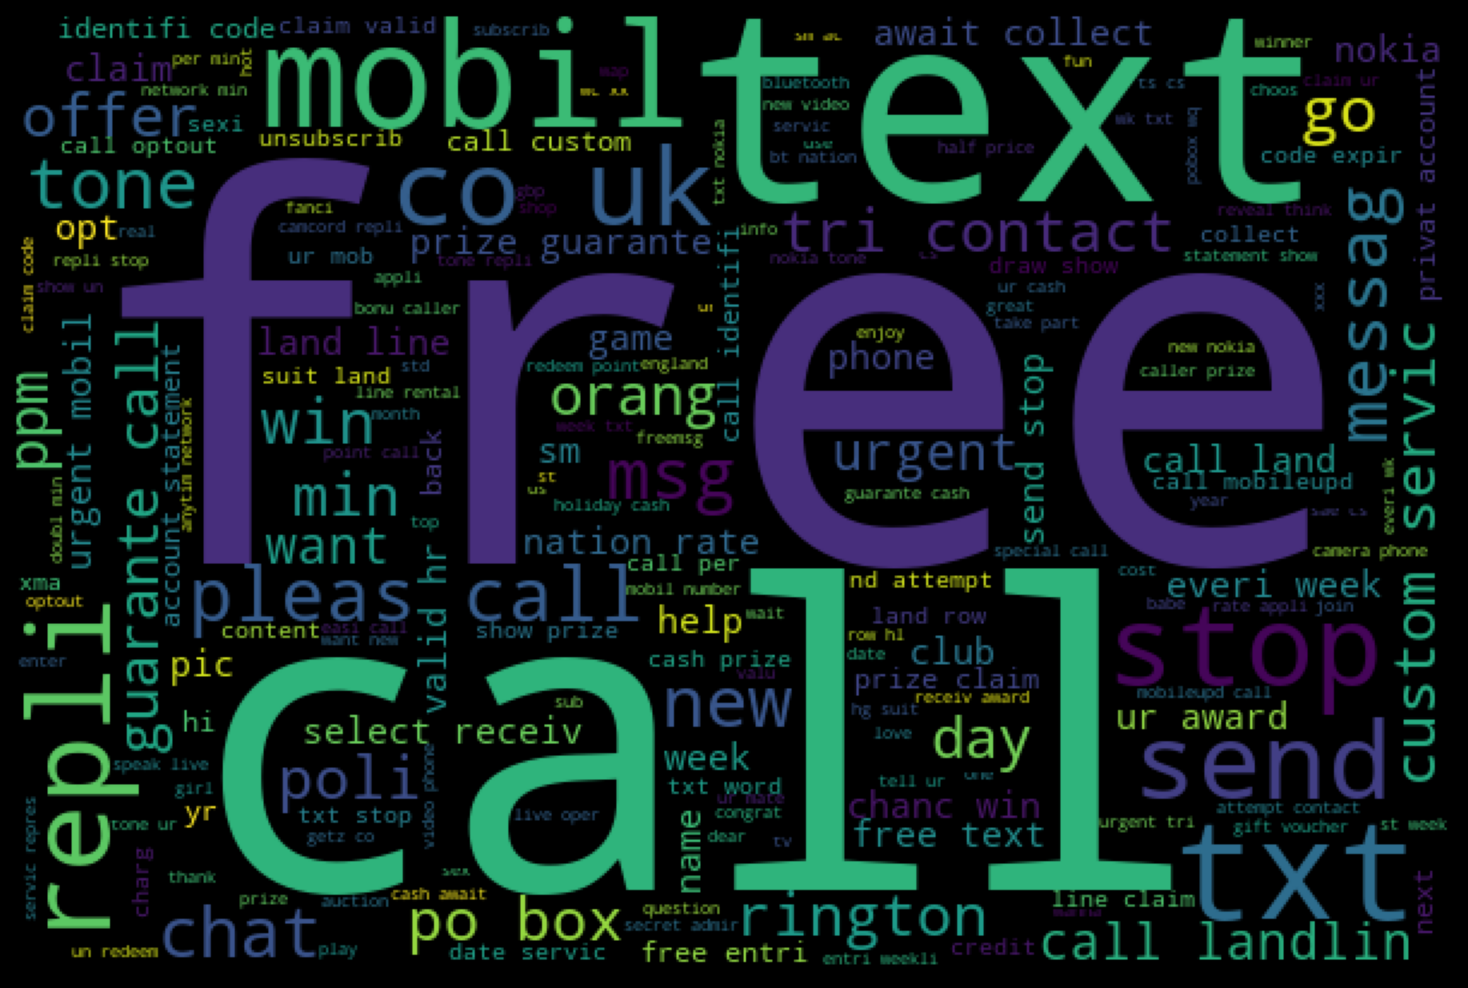

In [ ]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## BoW for Non-Spam Words

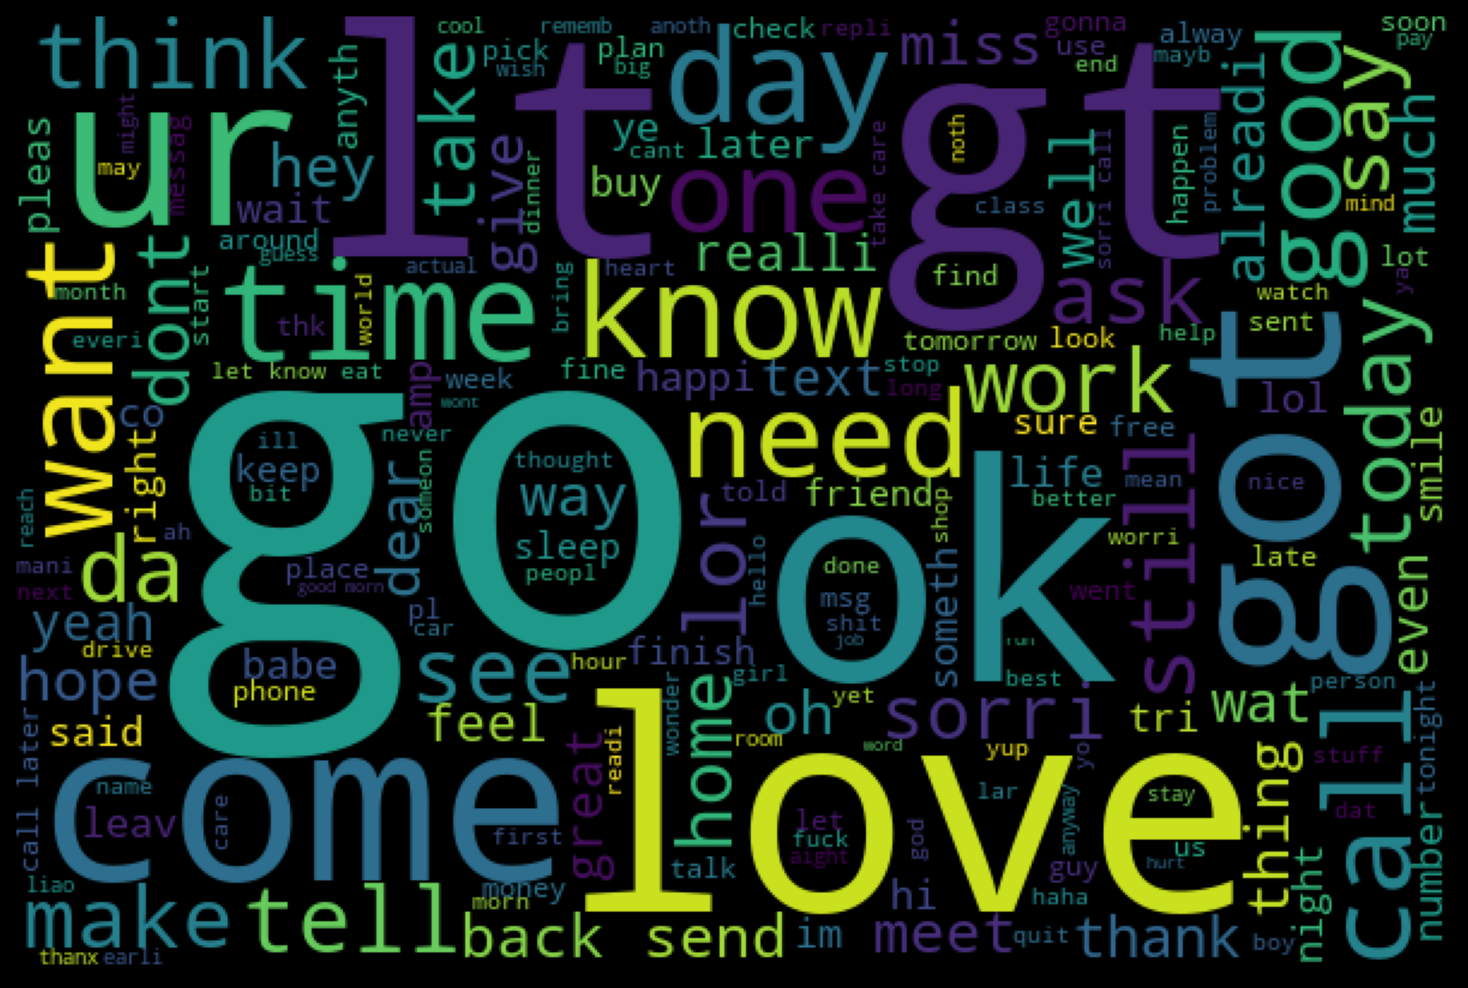

In [ ]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Adding Text Length as new Feature

In [ ]:
data['text_len'] = data['text'].apply(len)
data.head()

,label,text,label_cat,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
data.groupby('label').describe().T

label                    ham        spam
label_cat count  4825.000000  747.000000
          mean      0.000000    1.000000
          std       0.000000    0.000000
          min       0.000000    1.000000
          25%       0.000000    1.000000
          50%       0.000000    1.000000
          75%       0.000000    1.000000
          max       0.000000    1.000000
text_len  count  4825.000000  747.000000
          mean     71.023627  138.866131
          std      58.016023   29.183082
          min       2.000000   13.000000
          25%      33.000000  132.500000
          50%      52.000000  149.000000
          75%      92.000000  157.000000
          max     910.000000  224.000000

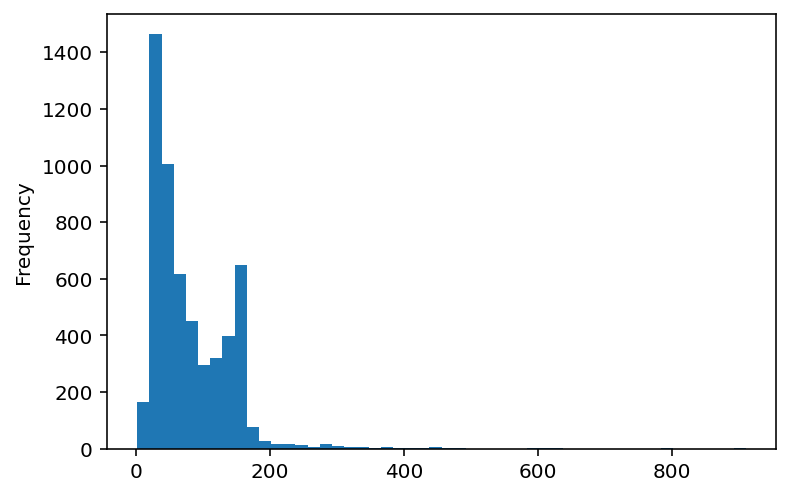

In [ ]:
data['text_len'].plot(kind='hist',bins=50)
plt.show()

Text(0.5, 1.0, 'listing_type')

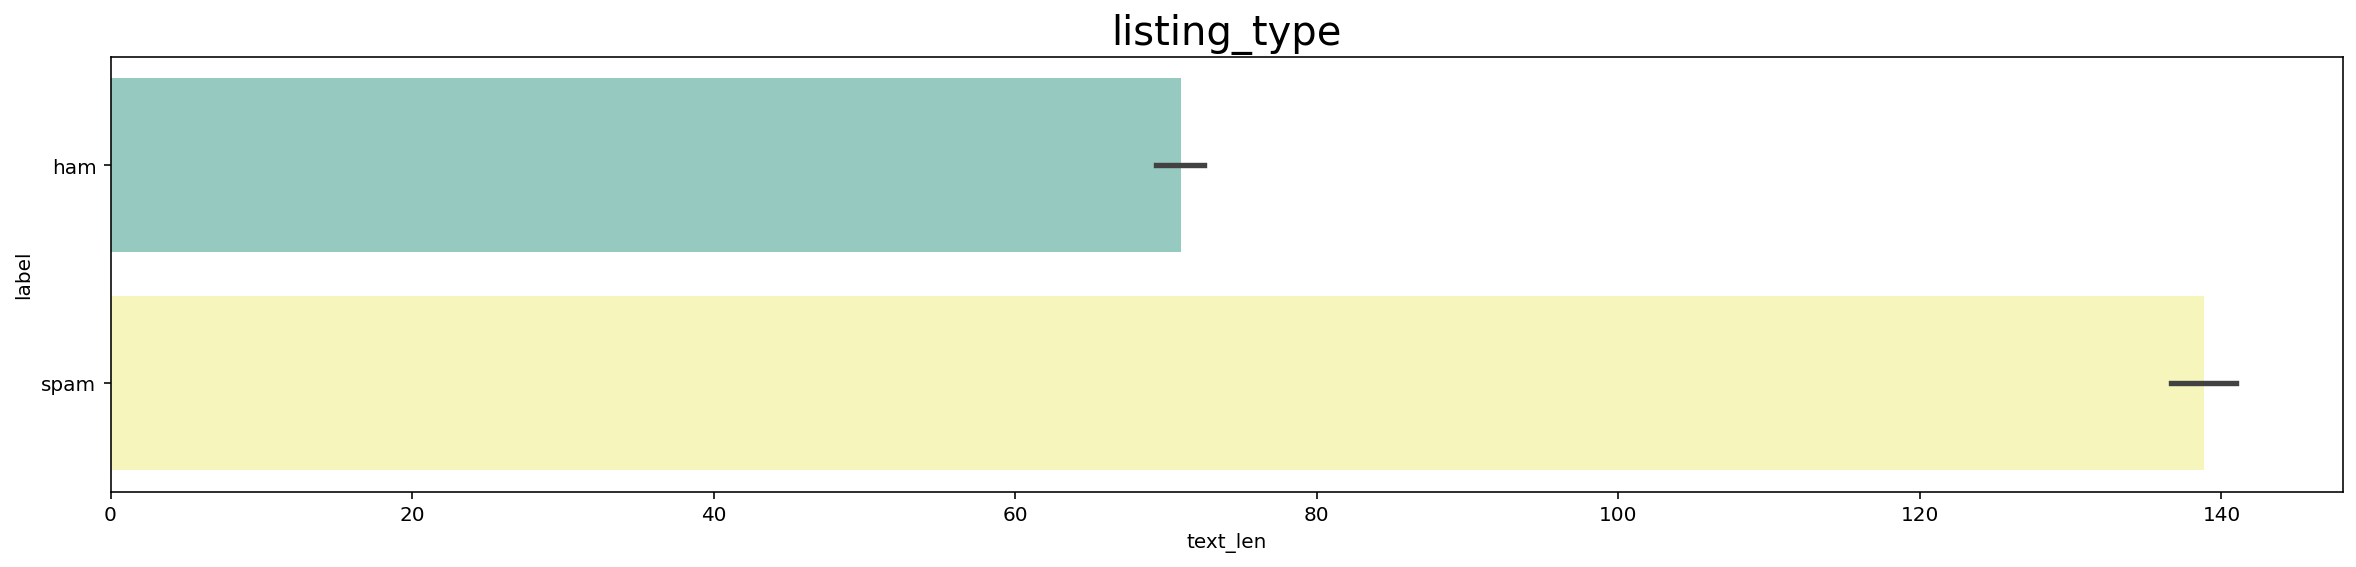

In [ ]:
# sns.barplot(data['Mes_len'],data['label'])
# plt.show()
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='text_len',y='label',ax=ax,data=data,palette='Set3')
plt.title("listing_type",fontsize=20)

In [ ]:
data.groupby('label')['text_len'].max()

label
ham     910
spam    224
Name: text_len, dtype: int64

In [ ]:
# lets check the message with the longest length for both classes
print(data.loc[data['text_len']==910,'text'][1084])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [ ]:
print(data.loc[data['text_len']==224,'text'][1020])

Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen


This means that the classification seems to be apt enough to be taken as correct

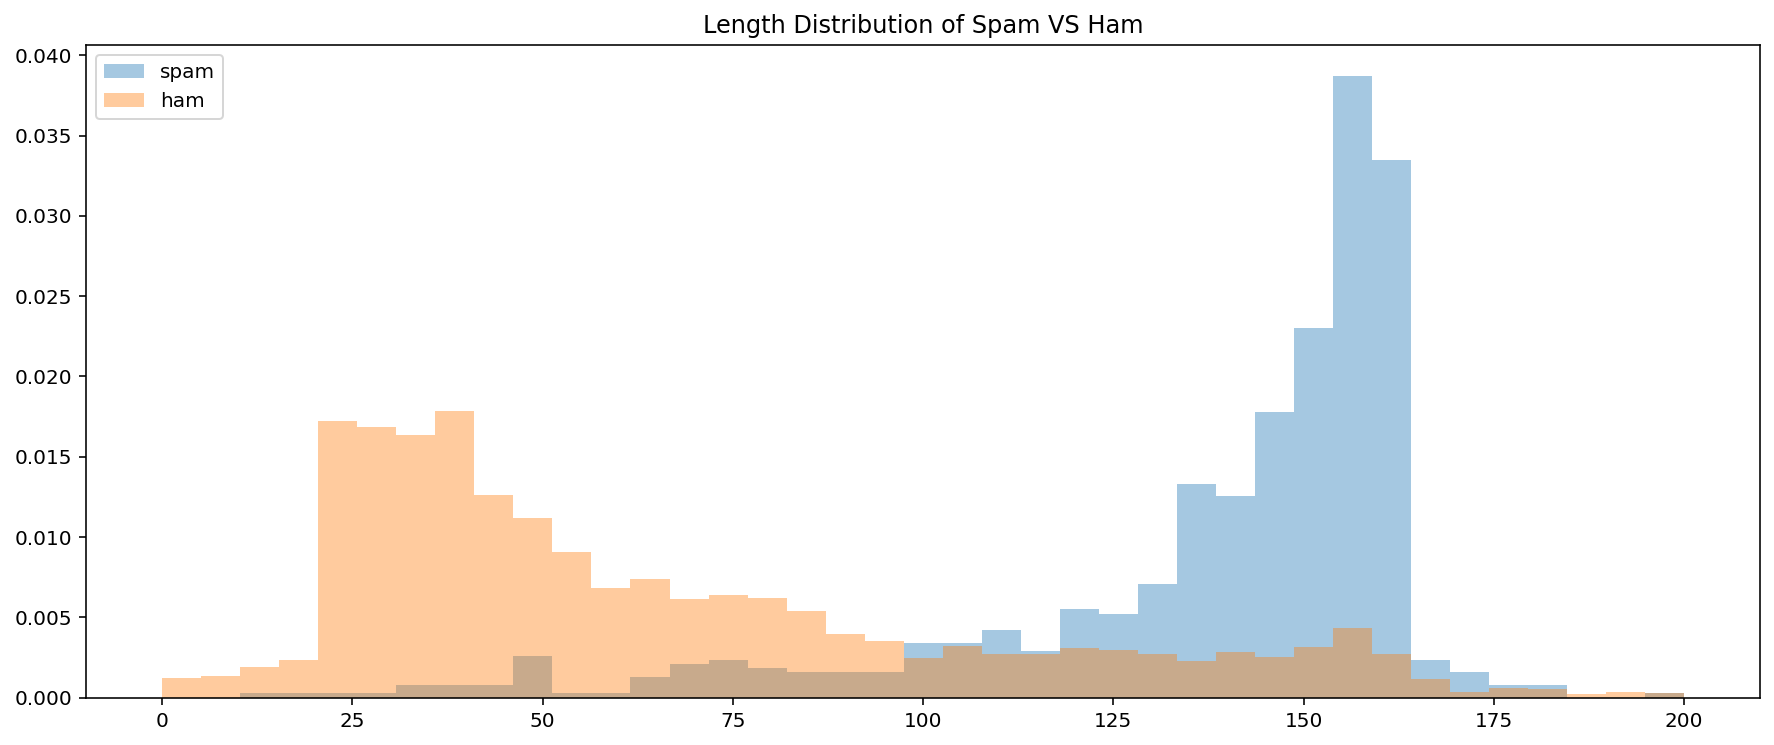

In [ ]:
# Plot the distribution of text length (spam vs ham)
plt.figure(figsize=(15,6))
plt.hist(data[data['label_cat']==1]['text_len'],bins = np.linspace(0,200,num=40),alpha=0.4,label='spam',density=True)
plt.hist(data[data['label_cat']==0]['text_len'],bins = np.linspace(0,200,num=40),alpha =0.4,label ='ham', density=True)
plt.legend(loc ='upper left')
plt.title('Length Distribution of Spam VS Ham')
plt.show()

It means usually shorter messages are hams and longer messages are spams. Hence, classifiers such as Naive Bayes might turnout to be a success over here

# Adding Clean Text to Dataset

In [ ]:

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
data['clean_text'] = data.text.apply(text_process)
data.head()
data['clean_text'].fillna("unknown", inplace=True)

In [ ]:
type(stopwords.words('english'))

list

# Tokenization

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

As deep learning models do not understand text, let’s convert text into numerical representation. For this purpose, a first step is Tokenization.
Tokenizer() does all the required pre-processing such as
1. tokenize into word or character — here we use at word level
2. num_words for maximum number of unique tokens hence we can filter out rare words
3. filter out punctuation terms
4. convert all words to lower case
5. convert all words to integer index

## Non-Spam Tokenization

In [ ]:
words = data[data.label=='ham'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
ham_words.most_common(50)

[('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('go', 247),
 ('ill', 236),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229),
 ('come', 224),
 ('good', 222),
 ('time', 189),
 ('day', 187),
 ('love', 185),
 ('going', 167),
 ('want', 163),
 ('one', 162),
 ('home', 160),
 ('lor', 160),
 ('need', 156),
 ('sorry', 153),
 ('still', 146),
 ('see', 137),
 ('n', 134),
 ('later', 134),
 ('da', 131),
 ('r', 131),
 ('back', 129),
 ('think', 128),
 ('well', 126),
 ('today', 125),
 ('send', 123),
 ('tell', 121),
 ('cant', 118),
 ('ì', 117),
 ('hi', 117),
 ('take', 112),
 ('much', 112),
 ('oh', 111),
 ('night', 107),
 ('hey', 106),
 ('happy', 105),
 ('great', 100),
 ('way', 100),
 ('hope', 99),
 ('pls', 98),
 ('work', 96),
 ('wat', 95),
 ('thats', 94),
 ('dear', 94)]

## Word2Vec for Non-Spam top 2 words

In [ ]:
# Word2Vec modeling. 
model = Word2Vec(words,min_count=10,size=32)

# Get specified vocabulary's vector. 
model.wv['get']
model.wv.most_similar("get")


[('home', 0.999812126159668),
 ('really', 0.9997965693473816),
 ('like', 0.9997949004173279),
 ('things', 0.9997597932815552),
 ('much', 0.9997550249099731),
 ('week', 0.9997496008872986),
 ('love', 0.9997473359107971),
 ('life', 0.9997344613075256),
 ('would', 0.9997312426567078),
 ('day', 0.9997285604476929)]

In [ ]:
model = Word2Vec(words,min_count=20,size=32)

# Get specified vocabulary's vector. 
model.wv['go']
model.wv.most_similar("go")


[('thought', 0.9997219443321228),
 ('meet', 0.9996649026870728),
 ('time', 0.9996569752693176),
 ('sure', 0.99965500831604),
 ('already', 0.999626874923706),
 ('miss', 0.9996249675750732),
 ('gud', 0.9996130466461182),
 ('around', 0.9996110200881958),
 ('really', 0.9995915293693542),
 ('also', 0.9995840787887573)]

## Spam Tokenization

In [ ]:
words = data[data.label=='spam'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
spam_words.most_common(50)

[('call', 347),
 ('free', 216),
 ('txt', 150),
 ('mobile', 123),
 ('text', 120),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101),
 ('prize', 92),
 ('get', 83),
 ('new', 69),
 ('send', 67),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60),
 ('contact', 56),
 ('service', 55),
 ('please', 52),
 ('guaranteed', 50),
 ('customer', 49),
 ('16', 49),
 ('week', 49),
 ('tone', 48),
 ('per', 46),
 ('phone', 45),
 ('18', 43),
 ('chat', 42),
 ('awarded', 38),
 ('draw', 38),
 ('latest', 36),
 ('å£1000', 35),
 ('line', 35),
 ('150ppm', 34),
 ('mins', 34),
 ('receive', 33),
 ('camera', 33),
 ('1', 33),
 ('every', 33),
 ('message', 32),
 ('holiday', 32),
 ('landline', 32),
 ('shows', 31),
 ('å£2000', 31),
 ('go', 31),
 ('box', 30),
 ('number', 30),
 ('apply', 29),
 ('code', 29),
 ('live', 29)]

## Word2Vec for Spam top 2 words

In [ ]:
# Word2Vec modeling. 
model = Word2Vec(words,min_count=10,size=32)

# Get specified vocabulary's vector. 
model.wv['call']
model.wv.most_similar("call")


[('claim', 0.999121904373169),
 ('free', 0.9990320205688477),
 ('prize', 0.99878990650177),
 ('contact', 0.9987812042236328),
 ('stop', 0.9986270666122437),
 ('mobile', 0.998624324798584),
 ('txt', 0.9986083507537842),
 ('text', 0.9985613822937012),
 ('voucher', 0.9985030889511108),
 ('nokia', 0.9984817504882812)]

In [ ]:
# Word2Vec modeling. 
model = Word2Vec(words,min_count=10,size=32)

# Get specified vocabulary's vector. 
model.wv['free']
model.wv.most_similar("free")


[('call', 0.9990412592887878),
 ('text', 0.9987950325012207),
 ('claim', 0.998604416847229),
 ('stop', 0.9984368085861206),
 ('contact', 0.998336672782898),
 ('mobile', 0.9982980489730835),
 ('line', 0.9982232451438904),
 ('new', 0.9982013702392578),
 ('prize', 0.9981836080551147),
 ('txt', 0.9981037378311157)]

# Chechking for Profanity

In [ ]:
!pip install profanity-check

In [ ]:
# import joblib
from profanity_check import predict, predict_prob

def check_profanity(df):
  data['contains_profanity'] = predict(data['text'])
  return data

data = check_profanity(data)
data

,label,text,label_cat,text_len,clean_text,contains_profanity
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...,0
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,2nd time tried contact å£750 Pound prize claim...,0
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,Ì b going esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity mood Soany suggestions,0
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,0


# Spam + Profanity

In [ ]:
result = data[(data['label'] == 'spam') & (data['contains_profanity']  == 1)]
result

,label,text,label_cat,text_len,clean_text,contains_profanity
683,spam,Hi I'm sue. I am 20 years old and work as a la...,1,158,Hi sue 20 years old work lapdancer love sex Te...,1
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...,1,155,Sex mobile FREE sexy pic Jordan text BABE 8860...,1
2263,spam,Not heard from U4 a while. Call 4 rude chat pr...,1,160,heard U4 Call rude chat private line 012235853...,1
2401,spam,Babe: U want me dont u baby! Im nasty and have...,1,152,Babe want baby nasty thing filthyguys Fancy ru...,1
2963,spam,"Do you ever notice that when you're driving, a...",1,135,ever notice youre driving anyone going slower ...,1
3139,spam,sexy sexy cum and text me im wet and warm and ...,1,144,sexy sexy cum text wet warm ready porn fun MSG...,1
3153,spam,Not heard from U4 a while. Call 4 rude chat pr...,1,160,heard U4 Call rude chat private line 012235853...,1
3546,spam,Rock yr chik. Get 100's of filthy films &XXX p...,1,152,Rock yr chik Get 100s filthy films XXX pics yr...,1
4198,spam,"cmon babe, make me horny, *turn* me on! Txt me...",1,148,cmon babe make horny turn Txt fantasy babe hot...,1
4525,spam,"I want some cock! My hubby's away, I need a re...",1,163,want cock hubbys away need real man satisfy Tx...,1


# Non-Spam + Profanity

In [ ]:
result = data[(data['label'] == 'ham') & (data['contains_profanity']  == 1)]
result

,label,text,label_cat,text_len,clean_text,contains_profanity
25,ham,Just forced myself to eat a slice. I'm really ...,0,144,forced eat slice really hungry tho sucks Mark ...,1
173,ham,"Bloody hell, cant believe you forgot my surnam...",0,105,Bloody hell cant believe forgot surname Mr Ill...,1
291,ham,Haf u found him? I feel so stupid da v cam was...,0,55,Haf found feel stupid da v cam working,1
297,ham,Hurt me... Tease me... Make me cry... But in t...,0,153,Hurt Tease Make cry end life die plz keep one ...,1
322,ham,cud u tell ppl im gona b a bit l8 cos 2 buses ...,0,107,cud tell ppl gona b bit l8 cos buses hav gon p...,1
...,...,...,...,...,...,...
5505,ham,What i told before i tell. Stupid hear after i...,0,127,told tell Stupid hear wont tell anything dad c...,1
5527,ham,"Total disappointment, when I texted you was th...",0,68,Total disappointment texted craziest shit got,1
5542,ham,Armand says get your ass over to epsilon,0,40,Armand says get ass epsilon,1
5559,ham,if you aren't here in the next &lt;#&gt; hou...,0,66,arent next ltgt hours imma flip shit,1


# Readability Score Added

In [ ]:
!pip install readability

  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35476 sha256=dfd410267b6dd53d6359a0280f83363048ed93cc7ce2ff68754f8764169421e0
  Stored in directory: /root/.cache/pip/wheels/b9/8b/5a/ba40b81d8e91c7bc1d4226fa51d7b5943d147be122df515c19
Successfully built readability


In [ ]:
import readability
count=0
readability_list = []
final_list = []
txt = data['clean_text']
for i in txt:
  if not i.strip():
    final_list.append(0)
  else:
    results = readability.getmeasures(i, lang='en')
    readability_list = results['readability grades']['FleschReadingEase']
    final_list.append(readability_list)
data['readability_score'] = final_list
data.describe()

,label_cat,text_len,contains_profanity,readability_score
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,0.027997,84.414829
std,0.340751,59.690841,0.164979,41.101875
min,0.000000,2.000000,0.000000,-555.580000
25%,0.000000,36.000000,0.000000,62.790000
50%,0.000000,61.000000,0.000000,84.900000
75%,0.000000,121.000000,0.000000,104.980000
max,1.000000,910.000000,1.000000,205.820000


In [ ]:
data.describe()

,label_cat,text_len,contains_profanity,readability_score
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,0.027997,84.414829
std,0.340751,59.690841,0.164979,41.101875
min,0.000000,2.000000,0.000000,-555.580000
25%,0.000000,36.000000,0.000000,62.790000
50%,0.000000,61.000000,0.000000,84.900000
75%,0.000000,121.000000,0.000000,104.980000
max,1.000000,910.000000,1.000000,205.820000


In [ ]:
def ReadabilityCategorize(x):
    if x<85:
        return 0
    elif x>=85:
        return 1
    else:
        return 0
    
data.insert(4, "readability_cat", data.apply(lambda row: ReadabilityCategorize(row['readability_score']), axis=1))
data

,label,text,label_cat,text_len,readability_cat,clean_text,contains_profanity,readability_score
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0,Go jurong point crazy Available bugis n great ...,0,79.557500
1,ham,Ok lar... Joking wif u oni...,0,29,1,Ok lar Joking wif oni,0,100.240000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,1,Free entry wkly comp win FA Cup final tkts 21s...,0,96.059545
3,ham,U dun say so early hor... U c already then say...,0,49,1,dun say early hor c already say,0,90.958571
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,1,Nah think goes usf lives around though,0,90.958571
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,1,2nd time tried contact å£750 Pound prize claim...,0,100.003529
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,1,Ì b going esplanade fr home,0,130.245000
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,0,Pity mood Soany suggestions,0,33.575000
5570,ham,The guy did some bitching but I acted like i'd...,0,125,0,guy bitching acted like id interested buying s...,0,65.725000


# Parts of Speech Added

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob
from collections import Counter
txt = data['clean_text']
count = 0
adj_list = []
adv_list = []
final_list_adj = []
final_list_adv = []
def textblob_adj(text):
  blobed = TextBlob(text)
  # counts = Counter(tag for word,tag in blobed.tags)
  adj_list = []
  adv_list = []
  adj_tag_list = ['JJ','JJR','JJS']
  adv_tag_list = ['RB','RBR','RBS']
  for (a, b) in blobed.tags:
      if b in adj_tag_list:
          adj_list.append(a)
      elif b in adv_tag_list:
          adv_list.append(a)
      else:
          pass
  return adj_list, adv_list

for i in txt:
  adj_list, adv_list = textblob_adj(i)
  # if not adj_list:
  #   final_list_adj.append(0)
  # else:
  #   final_list_adj.append(1)
  # if not adv_list:
  #   final_list_adv.append(0)
  # else:
  #   final_list_adv.append(1)
  final_list_adj.append(adj_list)
  final_list_adv.append(adv_list)

data['adjective'] = final_list_adj
data['adverb'] = final_list_adv
data

,label,text,label_cat,text_len,readability_cat,clean_text,contains_profanity,readability_score,adjective,adverb
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0,Go jurong point crazy Available bugis n great ...,0,79.557500,"[jurong, great, buffet, wat]","[n, amore]"
1,ham,Ok lar... Joking wif u oni...,0,29,1,Ok lar Joking wif oni,0,100.240000,[lar],[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,1,Free entry wkly comp win FA Cup final tkts 21s...,0,96.059545,"[Free, final, receive]",[]
3,ham,U dun say so early hor... U c already then say...,0,49,1,dun say early hor c already say,0,90.958571,[early],[already]
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,1,Nah think goes usf lives around though,0,90.958571,[usf],[]
...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,1,2nd time tried contact å£750 Pound prize claim...,0,100.003529,[easy],[]
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,1,Ì b going esplanade fr home,0,130.245000,[esplanade],[]
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,0,Pity mood Soany suggestions,0,33.575000,[],[]
5570,ham,The guy did some bitching but I acted like i'd...,0,125,0,guy bitching acted like id interested buying s...,0,65.725000,"[interested, next, free]",[else]


# Classification Model

In [ ]:
X = data['clean_text']
y = data['label_cat']

## Vectorize the data

In [ ]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

len(vect.get_feature_names())

2256

## Train and Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.1, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5014, 2256)
(558, 2256)
(5014,)
(558,)


## Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

model_lr = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',LogisticRegression()),
                   ])

model_lr.fit(X_train,y_train)

ytest = np.array(y_test)
pred_y = model_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.953405017921147
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       465
           1       0.99      0.73      0.84        93

    accuracy                           0.95       558
   macro avg       0.97      0.86      0.91       558
weighted avg       0.95      0.95      0.95       558



## MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',MultinomialNB()),
                   ])

model_nb.fit(X_train,y_train)

ytest = np.array(y_test)
pred = model_nb.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.96415770609319
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       465
           1       0.99      0.80      0.88        93

    accuracy                           0.96       558
   macro avg       0.97      0.90      0.93       558
weighted avg       0.96      0.96      0.96       558



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',RandomForestClassifier(n_estimators=50)),
                   ])

model_rf.fit(X_train,y_train)

ytest = np.array(y_test)
preds = model_rf.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(ytest, preds))

accuracy 0.9695340501792115
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       465
           1       0.99      0.83      0.90        93

    accuracy                           0.97       558
   macro avg       0.98      0.91      0.94       558
weighted avg       0.97      0.97      0.97       558



## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC, SVC

model_svc = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',LinearSVC()),
                     ])

model_svc.fit(X_train,y_train)

ytest = np.array(y_test)
predict = model_svc.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(predict, y_test))
print(classification_report(ytest, predict))

accuracy 0.982078853046595
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       465
           1       0.99      0.90      0.94        93

    accuracy                           0.98       558
   macro avg       0.98      0.95      0.97       558
weighted avg       0.98      0.98      0.98       558



## SGD Classifier

In [ ]:
>>> from sklearn.linear_model import SGDClassifier

model_sg = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',SGDClassifier()),
                     ])

model_sg.fit(X_train,y_train)

ytest = np.array(y_test)
predicted = model_sg.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(predicted, y_test))
print(classification_report(ytest, predicted))

accuracy 0.978494623655914
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       465
           1       0.98      0.89      0.93        93

    accuracy                           0.98       558
   macro avg       0.98      0.94      0.96       558
weighted avg       0.98      0.98      0.98       558



## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = Pipeline([('tfidf', TfidfTransformer()),
                    ('model', GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)),
                    ])

model_gb.fit(X_train,y_train)

ytest = np.array(y_test)
y_pred = model_gb.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(ytest, y_pred))

accuracy 0.9695340501792115
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       465
           1       0.95      0.86      0.90        93

    accuracy                           0.97       558
   macro avg       0.96      0.93      0.94       558
weighted avg       0.97      0.97      0.97       558



In [ ]:
log_acc = accuracy_score(pred_y, y_test)
nb_acc = accuracy_score(pred, y_test)
rf_acc = accuracy_score(preds, y_test)
gb_acc = accuracy_score(y_pred, y_test)
svm_acc = accuracy_score(predict, y_test)
sg_acc = accuracy_score(predicted, y_test)

In [ ]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'SVM', 'SGD'],
                      'Score': [log_acc, nb_acc, rf_acc, gb_acc, svm_acc, sg_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,SVM,0.982079
5,SGD,0.978495
2,Random Forest,0.969534
3,Gradient Boosting,0.969534
1,Naive Bayes,0.964158
0,Logistic Regression,0.953405
